# Import des librairies

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import des données

In [121]:
data = pd.read_csv("data.csv")

In [122]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Le but ici est de prédire si le diagnostique est "malade" (M) ou "bénin" (B). La target est donc la variable "diagnosis"

# Découverte des données

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [124]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Vérification de la distribution des variables 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124808588>,
      dtype=object)

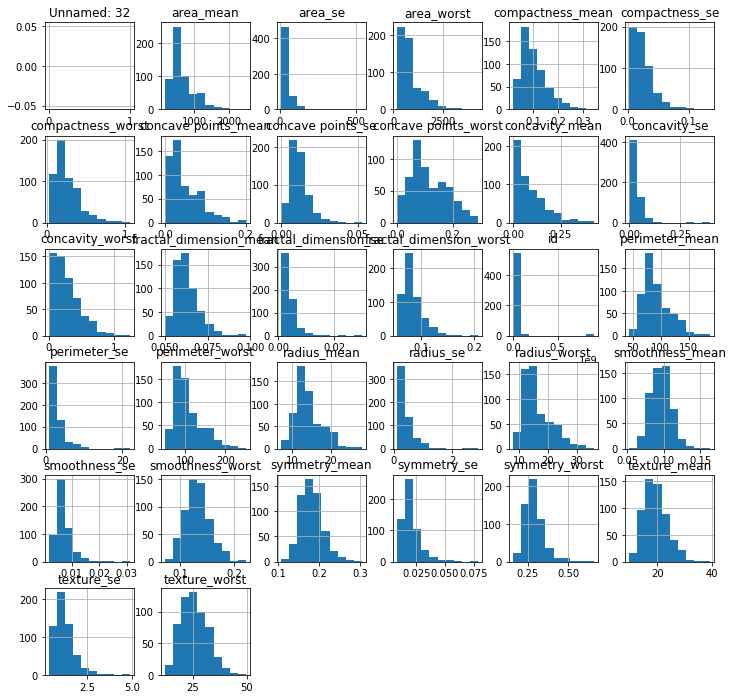

In [125]:
data.hist(figsize = (12,12))

# Suppression des colonnes contenant trop de valeurs manquantes

In [126]:
data.isna().sum()['Unnamed: 32'] / data.shape[0]

1.0

In [127]:
data = data.drop(columns = 'Unnamed: 32')

# Suppression de la Colonne id qui n'apporte pas d'information pour la modélisation

In [128]:
data = data.drop(columns = 'id')

# Observation de la Target

In [129]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [130]:
print(data[data.diagnosis == 'M'].shape[0]/data.shape[0])
print(data[data.diagnosis == 'B'].shape[0]/data.shape[0])



0.37258347978910367
0.6274165202108963


# Création d'un set de test

In [228]:
train_set, test_set = train_test_split(data, test_size=0.2)

# Correlations entre les variables 

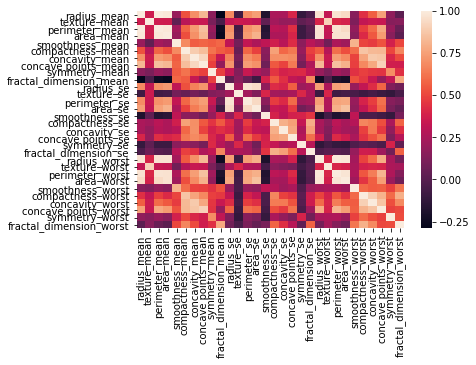

In [214]:
corr = train_set.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

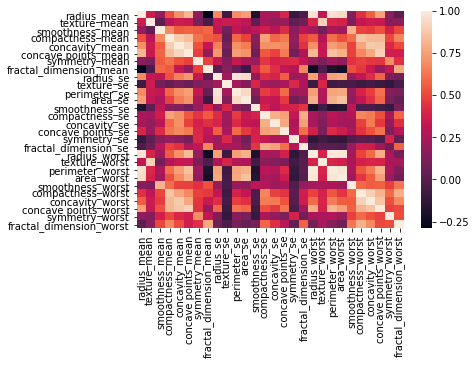

In [215]:
train_set = train_set.drop(columns = ['perimeter_mean', 'area_mean'])
corr = train_set.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

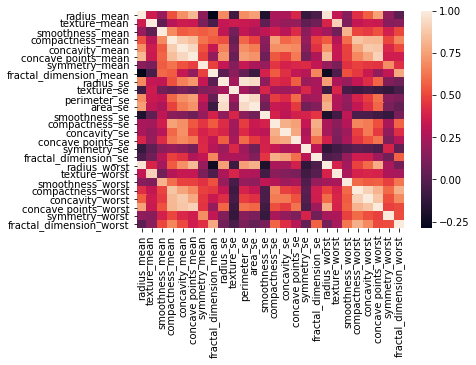

In [216]:
train_set = train_set.drop(columns = ['perimeter_worst', 'area_worst'])
corr = train_set.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

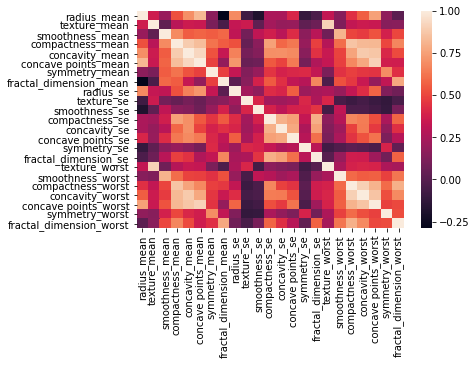

In [217]:
train_set = train_set.drop(columns = ['radius_worst','perimeter_se','area_se'])
corr = train_set.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

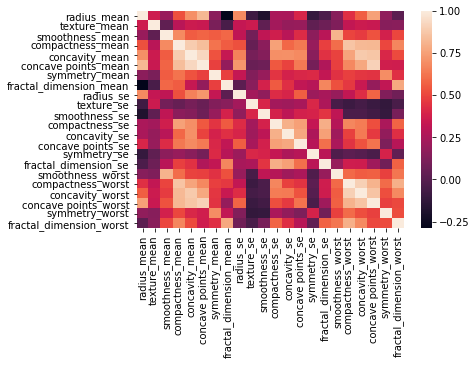

In [218]:
train_set = train_set.drop(columns = ['texture_worst'])
corr = train_set.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Encodage de la variable "Diagnosis" - Train

In [229]:
train_set_dummy = pd.get_dummies(train_set,"diagnosis")

In [230]:
train_set_dummy_drop = train_set_dummy.drop(columns = ['diagnosis_B', 'diagnosis_M'])

# Scaling du data set - Train

In [233]:
scaler = StandardScaler()
scaler.fit(train_set_dummy_drop)
train_set_dummy_drop_scl = pd.DataFrame(scaler.fit_transform(train_set_dummy_drop), columns=train_set_dummy_drop.columns)

In [246]:
train_set_dummy_drop_scl.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.104653,0.389986,-0.058456,-0.205127,1.618716,1.140571,0.080266,0.292320,1.387813,1.726305,...,0.186783,0.435866,0.120346,0.050793,1.442624,0.741918,0.004647,0.641950,0.461700,1.759725
1,-0.073092,1.242038,0.029899,-0.153657,1.426449,1.207760,0.620445,0.491280,1.673516,1.413583,...,-0.034909,1.225864,-0.018340,-0.145511,2.044817,0.921529,0.352337,0.588995,1.174861,1.937456
2,-0.314103,0.045440,-0.294070,-0.387847,-0.026944,0.170054,-0.209997,-0.487839,-0.185363,0.395047,...,-0.370615,-0.582902,-0.223053,-0.422318,-0.131681,0.470603,0.381022,-0.220753,1.088654,0.457850
3,-0.652667,-0.599420,-0.523462,-0.622322,0.920859,1.243221,1.008490,0.659907,3.130964,1.609400,...,-0.514187,0.146200,-0.442539,-0.499038,0.285553,1.001216,0.907750,1.109461,4.502420,1.087682
4,-1.160512,0.494746,-1.178868,-0.978896,-1.068032,-1.199495,-1.091450,-1.113533,-0.659124,0.247454,...,-1.069474,0.567533,-1.106122,-0.886964,-0.828504,-1.138058,-1.258758,-1.322052,-0.865876,-0.155875


In [237]:
train_set_dummy = train_set_dummy[['diagnosis_B', 'diagnosis_M']]

In [240]:
train_set_dummy_scl = train_set_dummy_drop_scl.merge(train_set_dummy, left_index=True, right_index=True)

In [241]:
train_set_dummy_scl.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,-0.104653,0.389986,-0.058456,-0.205127,1.618716,1.140571,0.080266,0.292320,1.387813,1.726305,...,0.120346,0.050793,1.442624,0.741918,0.004647,0.641950,0.461700,1.759725,0,1
1,-0.073092,1.242038,0.029899,-0.153657,1.426449,1.207760,0.620445,0.491280,1.673516,1.413583,...,-0.018340,-0.145511,2.044817,0.921529,0.352337,0.588995,1.174861,1.937456,0,1
2,-0.314103,0.045440,-0.294070,-0.387847,-0.026944,0.170054,-0.209997,-0.487839,-0.185363,0.395047,...,-0.223053,-0.422318,-0.131681,0.470603,0.381022,-0.220753,1.088654,0.457850,0,1
3,-0.652667,-0.599420,-0.523462,-0.622322,0.920859,1.243221,1.008490,0.659907,3.130964,1.609400,...,-0.442539,-0.499038,0.285553,1.001216,0.907750,1.109461,4.502420,1.087682,0,1
4,-1.160512,0.494746,-1.178868,-0.978896,-1.068032,-1.199495,-1.091450,-1.113533,-0.659124,0.247454,...,-1.106122,-0.886964,-0.828504,-1.138058,-1.258758,-1.322052,-0.865876,-0.155875,0,1


# Encodage de la variable "Diagnosis" - Test

In [242]:
test_set_dummy = pd.get_dummies(test_set,"diagnosis")

In [243]:
test_set_dummy_drop = test_set_dummy.drop(columns = ['diagnosis_B', 'diagnosis_M'])

# Scaling du data set - Train

In [244]:
test_set_dummy_drop_scl = pd.DataFrame(scaler.fit_transform(test_set_dummy_drop), columns=test_set_dummy_drop.columns)

In [245]:
test_set_dummy_drop_scl.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.017250,1.680504,-0.046403,-0.083047,-1.932790,-1.136349,-0.690084,-0.872434,-0.387814,-1.133335,...,-0.240781,0.877409,-0.270331,-0.312380,-1.567288,-0.797120,-0.634545,-1.016615,-1.040653,-1.186447
1,-1.047861,0.765426,-1.066711,-0.953608,0.311065,-0.816452,-0.803724,-0.836290,-0.433403,0.301442,...,-1.106132,-0.346674,-1.135540,-0.914235,-0.963251,-1.189064,-1.092793,-1.399655,-1.262689,-1.013064
2,-0.021083,-0.041720,0.177743,-0.128263,-1.333955,2.340440,2.385963,0.715044,-0.399211,1.851205,...,-0.260140,-0.423968,-0.081870,-0.353809,-2.152629,0.992359,1.669713,0.473910,-0.940926,1.226505
3,-0.656316,0.218726,-0.624042,-0.655513,-0.787748,-0.143126,-0.331208,-0.334457,-0.839913,0.569744,...,-0.658937,0.137596,-0.504480,-0.617434,-1.092687,0.088780,-0.247103,-0.075983,-0.814855,0.761752
4,0.885219,-1.121043,0.867455,0.779420,0.095570,0.153601,0.051184,0.755641,-0.266241,-0.218553,...,0.651673,-1.088065,0.714808,0.484484,-0.426329,0.088125,-0.193304,0.396925,-0.267294,-0.380468


In [247]:
test_set_dummy = test_set_dummy[['diagnosis_B', 'diagnosis_M']]

In [248]:
test_set_dummy_scl = test_set_dummy_drop_scl.merge(test_set_dummy, left_index=True, right_index=True)

In [254]:
test_set_dummy_scl.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
6,0.208915,-0.806631,0.248040,-0.003778,1.271194,1.474647,0.225525,0.907815,0.729138,0.187733,...,-0.113280,-0.267066,0.201678,0.134614,-0.422819,0.345078,-0.579648,-0.458019,0,1
11,-0.237391,-1.353332,-0.244439,-0.361604,0.709341,0.149537,-0.422490,0.051870,-0.114275,0.407485,...,-0.426240,-0.432783,0.235236,-0.116817,-0.471411,0.206819,0.618965,0.398923,0,1
14,-1.254585,1.964413,-1.274387,-1.074465,-1.229407,-1.257682,-0.914236,-1.054205,-0.714541,-0.470246,...,-1.194649,-0.934950,-1.121451,-1.026944,-0.961245,-1.126122,-1.085813,-0.772655,0,1
15,0.000821,-1.491767,-0.035959,-0.096723,0.137531,-0.648375,-0.429673,-0.121781,1.010275,-1.114171,...,0.015217,-0.088080,-0.224983,-0.754560,-0.565126,-0.182820,0.308492,-1.403590,0,1
23,1.071408,0.035710,1.052235,1.016390,-0.177533,0.017432,0.212783,0.610801,-0.057287,-0.738548,...,1.237361,1.097830,0.470139,-0.066400,0.368552,1.144780,0.310374,-0.131750,0,1


# Modélisation 1 : LinearSVC

In [154]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

In [285]:
y_train = train_set_dummy_scl['diagnosis_M']
X_train = train_set_dummy_scl.drop(columns = ['diagnosis_M'])
#X_train, y_train = make_classification(n_features=train_set_dummy_scl.shape[1], random_state=0)
model_svc = LinearSVC()
model_svc.fit(X_train, y_train)  

/Users/julieG/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [286]:
y_train_pred = model_svc.predict(X_train)

In [287]:
y_test = test_set_dummy_scl['diagnosis_M']
X_test = test_set_dummy_scl.drop(columns = ['diagnosis_M'])

#X_test, y_test = make_classification(n_features=test_set_dummy_scl.shape[1], random_state=0)

#model_svc.fit(X_test, y_test)  
y_test_pred = model_svc.predict(X_test)

In [288]:
from sklearn.metrics import accuracy_score

In [289]:
accuracy_score(y_test, y_test_pred)

1.0

In [290]:
accuracy_score(y_train, y_train_pred)

1.0

In [291]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[10,  0],
       [ 0, 15]])

In [292]:
confusion_matrix(y_train, y_train_pred)

array([[218,   0],
       [  0, 151]])

In [293]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

1.0

In [294]:
model_svc.coef_
model_svc.score(X_train, y_train)

1.0

In [295]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.0

# Modélisation 2 : KNeighbors Approximation 

In [296]:
from sklearn.neighbors import KNeighborsClassifier

y_train = train_set_dummy_scl['diagnosis_M']
X_train = train_set_dummy_scl.drop(columns = ['diagnosis_M'])

model_neigh = KNeighborsClassifier(n_neighbors=2)
model_neigh.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [297]:
y_train_pred = model_neigh.predict(X_train)

In [298]:
y_test = test_set_dummy_scl['diagnosis_M']
X_test = test_set_dummy_scl.drop(columns = ['diagnosis_M'])

y_test_pred = model_svc.predict(X_test)


In [299]:
accuracy_score(y_train, y_train_pred)

0.8455284552845529

In [300]:
accuracy_score(y_test, y_test_pred)

1.0

In [301]:
confusion_matrix(y_train, y_train_pred)

array([[218,   0],
       [ 57,  94]])

In [302]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0],
       [ 0, 15]])

In [303]:
f1_score(y_train, y_train_pred, average='micro')

0.845528455284553

In [304]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.3930286817974576

In [305]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.0